<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JuanMelendres/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**

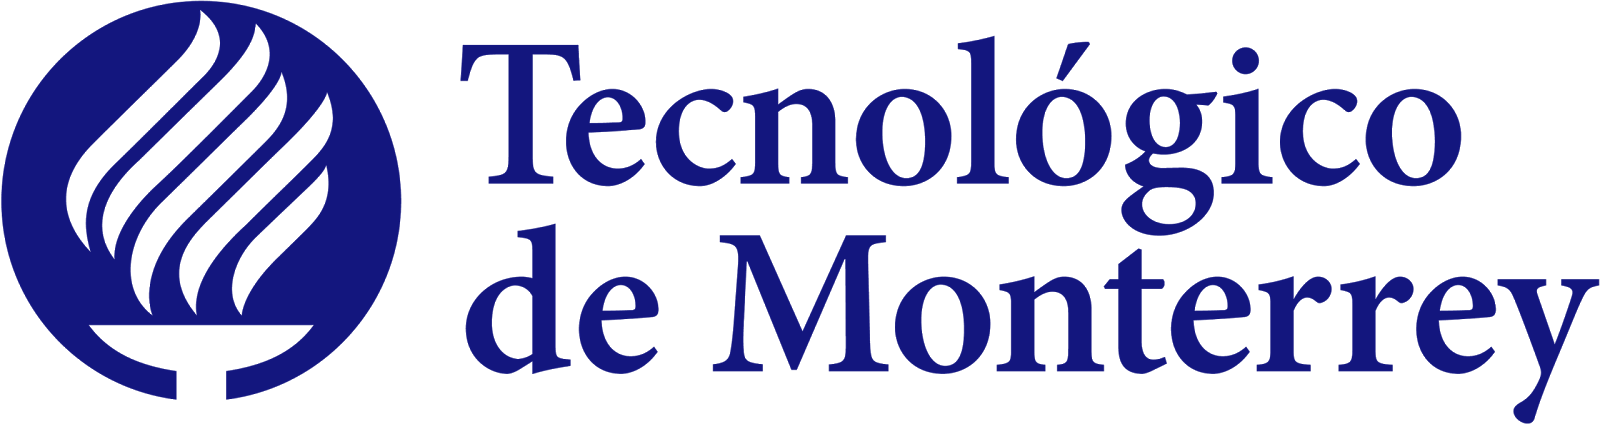

*   **Alumno:** Juan Antonio Melendres Villa
*   **Matrícula:** A00369017
*   **Materia:** Ciencia y analítica de datos (Gpo 10)
*   **Profesor:** María de la Paz Rico Fernández.
*   **Fecha:** 24 de Octubre de 2022

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
from numpy.linalg import inv
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W, D)
B = np.dot(B, Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


**Realiza las 3 descomposiciones-reconstrucciones**

**Matriz 1**

In [2]:
#Matriz 1
# definimos la matriz 3 x 3
A = array([[3,0,2], [3,0,-2], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 7  8  9]]
-----------------------------


In [3]:
'''
Utilizaremos el método eig a la matriz A que calcula los valores propios y los vectores propios derechos de una matriz cuadrada.
Asiganmos los valores en las variables correspondientes.
Un eigenvalor de una transformación lineal T : V → V es un escalar tal que λ id – T no es invertible.
'''
# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Valores propios-------")
print(values) # D
print("-----------------------------")
print("-------Vectores propios-------")
print(vectors) # W
print("-----------------------------")

-------Valores propios-------
[10.06651756+0.j          0.96674122+2.93291263j  0.96674122-2.93291263j]
-----------------------------
-------Vectores propios-------
[[-0.27069469+0.j          0.07463723-0.35154855j  0.07463723+0.35154855j]
 [ 0.10935109+0.j         -0.67794018+0.j         -0.67794018-0.j        ]
 [-0.95643438+0.j          0.4396522 +0.46684683j  0.4396522 -0.46684683j]]
-----------------------------


In [4]:
#Ejemplo de reconstrucción
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W, D)
B = np.dot(B, Winv)
print(B.round(2))
print("-----------------------------")

-------Matriz reconstruida-------
[[ 3.+0.j  0.+0.j  2.-0.j]
 [ 3.-0.j -0.+0.j -2.+0.j]
 [ 7.+0.j  8.+0.j  9.-0.j]]
-----------------------------


**Matriz 2**

In [5]:
#Matriz 2
# definimos la matriz 3 x 3
A = array([[1,3,8], [2,0,0], [0,0,1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------


In [6]:
'''
Utilizaremos el método eig a la matriz A que calcula los valores propios y los vectores propios derechos de una matriz cuadrada.
Asiganmos los valores en las variables correspondientes.
Un eigenvalor de una transformación lineal T : V → V es un escalar tal que λ id – T no es invertible.
'''
# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Valores propios-------")
print(values) # D
print("-----------------------------")
print("-------Vectores propios-------")
print(vectors) # W
print("-----------------------------")

-------Valores propios-------
[ 3. -2.  1.]
-----------------------------
-------Vectores propios-------
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-----------------------------


In [7]:
#Ejemplo de reconstrucción
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W, D)
B = np.dot(B, Winv)
print(B.round(2))
print("-----------------------------")

-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


**Matriz 3**

In [8]:
#Matriz 3
# definimos la matriz 3 x 3
A = array([[5,4,0], [1,0,1], [10,7,1]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------


In [9]:
'''
Utilizaremos el método eig a la matriz A que calcula los valores propios y los vectores propios derechos de una matriz cuadrada.
Asiganmos los valores en las variables correspondientes.
Un eigenvalor de una transformación lineal T : V → V es un escalar tal que λ id – T no es invertible.
'''
# calcula la eigendescomposición
values, vectors = eig(A)
print("-------Valores propios-------")
print(values) # D
print("-----------------------------")
print("-------Vectores propios-------")
print(vectors) # W
print("-----------------------------")

-------Valores propios-------
[ 6.89167094 -0.214175   -0.67749594]
-----------------------------
-------Vectores propios-------
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-----------------------------


In [10]:
#Ejemplo de reconstrucción
W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(W, D)
B = np.dot(B, Winv)
print(B.round(2))
print("-----------------------------")

-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


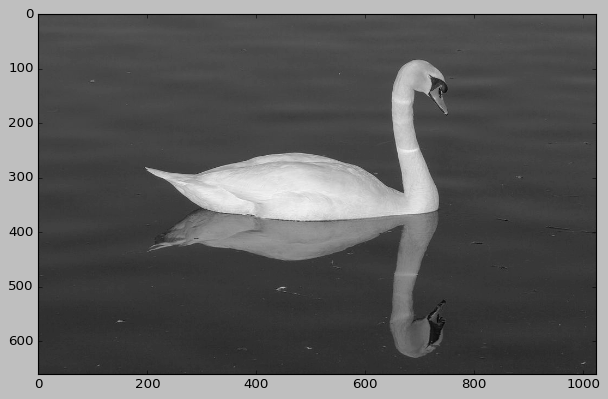

<PIL.Image.Image image mode=LA size=1024x660 at 0x7F7BB3F086D0>


In [11]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [12]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(660, 1024)

In [13]:
U.shape

(660, 660)

In [14]:
V.shape

(1024, 1024)

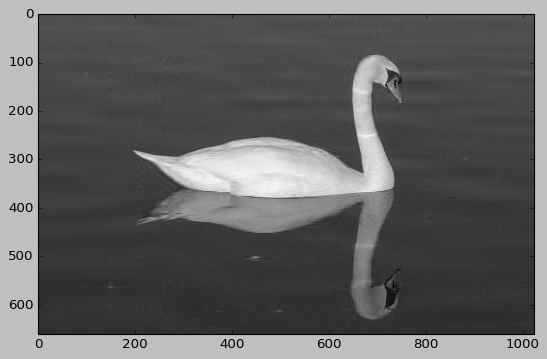

Felicidades la imagen está comprimida


In [15]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

**Imagen 1**

[136. 136. 137. ...  89.  92.  93.]


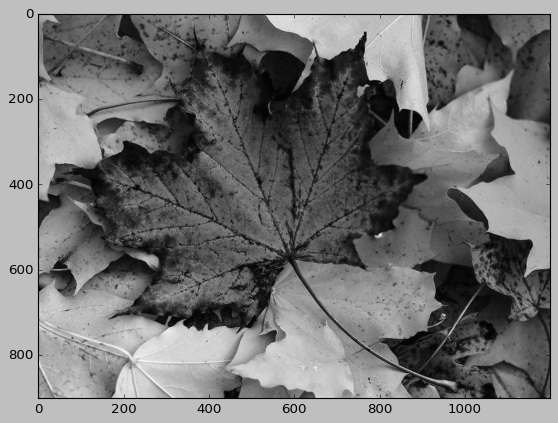

<PIL.Image.Image image mode=LA size=1200x900 at 0x7F7BAFA79A90>


In [16]:
#imagen 1
plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
# la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://album.mediaset.es/eimg/10000/2020/09/23/clipping_Ud3GRM_1714.jpg?w=1200&h=900')).convert('LA')
# img = Image.open('hoja.jpg')
imggray = img.convert('LA') # Devuelve una copia convertida de la imagen de la hoja, traduce los pixeles a través de la paleta.
# Toma la imagen de la hoja y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [17]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(900, 1200)

In [18]:
U.shape

(900, 900)

In [19]:
V.shape

(1200, 1200)

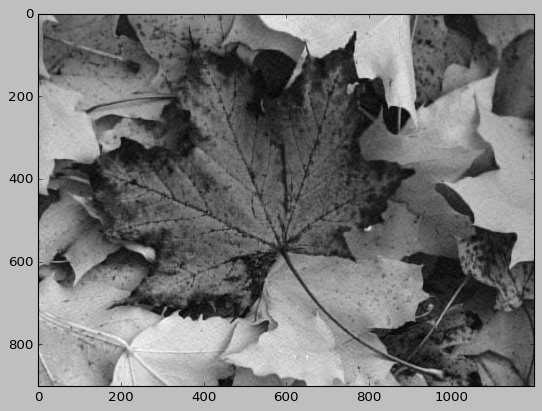

Felicidades la imagen está comprimida


In [20]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 100
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

**Imagen 2**

[ 59.  55.  49. ... 151. 149. 134.]


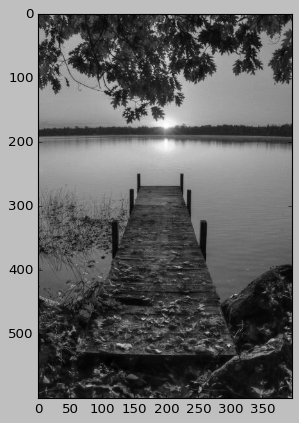

<PIL.Image.Image image mode=LA size=396x600 at 0x7F7BAF95FFD0>


In [21]:
#imagen 2
plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
# la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://i.pinimg.com/originals/d6/cb/a8/d6cba8f28742330951c0f82773168fd6.jpg')).convert('LA')
# img = Image.open('atardecer.jpg')
imggray = img.convert('LA') # Devuelve una copia convertida de la imagen del atardecer, traduce los pixeles a través de la paleta.
# Toma la imagen del atardecer y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [22]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(600, 396)

In [23]:
U.shape

(600, 600)

In [24]:
V.shape

(396, 396)

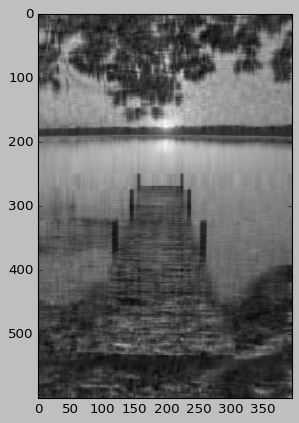

Felicidades la imagen está comprimida


In [25]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 20
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

**Imagen 3**

[38. 35. 34. ... 20. 19. 19.]


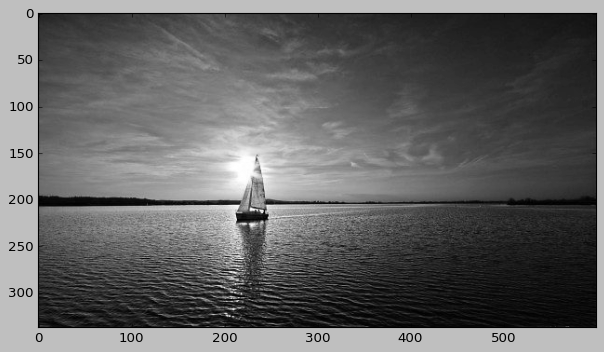

<PIL.Image.Image image mode=LA size=600x337 at 0x7F7BAF95FE50>


In [26]:
#imagen 3
plt.style.use('classic') # configura gráfico classic. Variable llamada imagen
# la URL importa la imagen y con convert LA la deja en escala de grises
img = Image.open(urllib.request.urlopen('https://hatterkeptar.hu/hatterkep_kepek_mobil/csonak-eg-tenger-vitorla-naplemente-viz-hatterkep-17895.jpg')).convert('LA')
# img = Image.open('barco.jpg')
imggray = img.convert('LA') # Devuelve una copia convertida de la imagen del barco, traduce los pixeles a través de la paleta.
# Toma la imagen del barco y la convierte en gris. Crea la lista de datos y los convierte en arreglos 
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [27]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape

(337, 600)

In [28]:
U.shape

(337, 337)

In [29]:
V.shape

(600, 600)

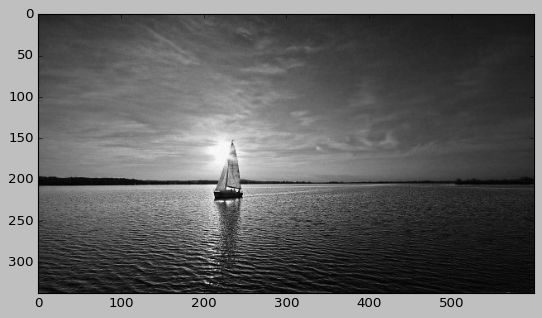

Felicidades la imagen está comprimida


In [30]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 150
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [31]:
#tu codigo aqui
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot') 
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target 
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X) 
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

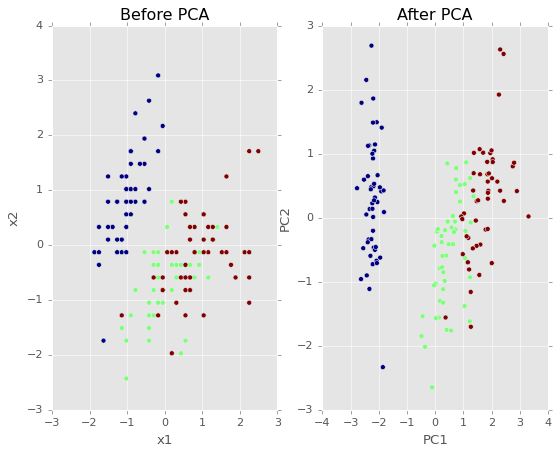

In [32]:
'''
Grafiquemos los datos antes y después de la transformación PCA y también codifiquemos con colores cada punto (muestra) usando la clase correspondiente de la flor (y).
'''
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [33]:
'''
Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.
'''
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [34]:
'''
La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido:
'''
np.cov(X_new.T)
array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

array([[2.93808505e+00, 4.83198016e-16],
       [4.83198016e-16, 9.20164904e-01]])

In [35]:
'''
Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los valores propios reales de la covarianza almacenada en pca.explained_variance_:
'''
pca.explained_variance_ 
array([2.93808505, 0.9201649])

array([2.93808505, 0.9201649 ])

In [36]:
'''
La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los vectores propios (mayor magnitud, mayor importancia).
Encontremos las características más importantes:
'''
print(abs(pca.components_))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [37]:
'''
El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA.
Hay una implementación en R pero no hay una implementación estándar en python, así que decidí escribir mi propia función para eso:
'''
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''    
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

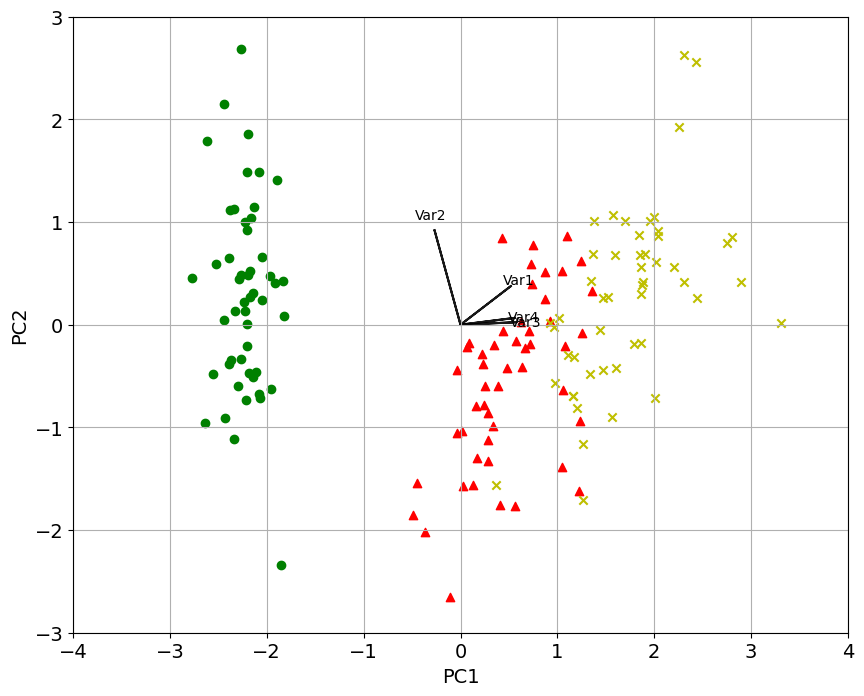

In [38]:
'''
Llame a la función (asegúrese de ejecutar primero los bloques iniciales de código donde cargamos los datos del iris y realizamos el análisis PCA):
'''
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [39]:
'''
De nuevo podemos verificar visualmente que a) la varianza está maximizada yb) que las características 1, 3 y 4 son las más importantes para PC1.
De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.
Las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan
Las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.

Para verificar se usa el código:
'''
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
print(np.corrcoef(X[:,2], X[:,3])[1,0])
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
print(np.corrcoef(X[:,1], X[:,2])[1,0])

0.9628654314027957
-0.42844010433054014


Describe lo relevante del ejercicio y que descubriste de las variables análizadas.

Para mí, una parte importante del ejercicio fue aprender nuevas técnicas que nos permitan trabajar en una mejor estrategia para analizar y usar datos. Con respecto a las variables, encontré que las flechas que apuntan en la misma dirección indican una correlación entre las variables. Usamos este método cuando hay una correlación muy alta entre algunas de las  
 variables, por lo que podemos reducir el tamaño o las dimensiones fijas si realmente afecta los resultados del modelo.

Contesta las siguientes preguntas en una o varias celdas de texto en tu notebook:

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.


1. **¿Qué es feature importance y para que nos sirve?**
Se utiliza para calcular las propiedades de entrada del modelo. Esto nos ayuda a ver cuando nuestro modelo está funcionando de forma intuitiva y también muestra a terceros cuando está funcionando correctamente. Cuanto más cerca esté el valor de la característica a uno, mayor será su peso en el componente principal.

2. **¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?**
Comprender el uso de matrices y sus funciones para determinar autovalores y las transformaciones algebraicas de valores proporcionan reducción de dimensionalidad. Lo más interesante que encontré es que con solo los dos primeros componentes principales podemos retener más del 95% de la varianza del conjunto de datos que usamos.

3. **¿Dónde lo aplicarías o te sería de utilidad este conocimiento?**
Esto me ayudó a comprender lo que cada fuente de datos quería transmitir y optimizar el aprendizaje automático y reducir la complejidad computacional. En logística, por ejemplo, esta investigación también se puede aplicar para decidir qué ubicación geográfica es mejor para construir un almacén. Si reducimos la complejidad, podemos usar menos recursos en tiempo real.